# Data Analysis with Python using Forbes 2022 Dataset

Hi Guys, Welcome to [Be.Analyst](https://youtube.com/@Be.Analyst) 😀
</br>
In this notebook, I'm going to talk about data analysis with Python.
</br>
Happy learning 🐱‍🏍 

## Loading Data

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("DataSets/forbes_2022_billionaires.csv")

In [4]:
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [5]:
df.shape

(2668, 22)

In [6]:
df.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

## Data Preprocessing

In [7]:
df = df.loc[:,["rank","personName","age","finalWorth","category","country","gender"]]

In [8]:
df.head()

,rank,personName,age,finalWorth,category,country,gender
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
3,4,Bill Gates,66.0,129000.0,Technology,United States,M
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [9]:
df=df.rename(columns={"rank":"Sıra","personName":"İsim","age":"Yaş",
                      "finalWorth":"Servet","category":"Kategori",
                       "country":"Ülke", "gender":"Cinsiyet"})

In [10]:
df.head()

,Sıra,İsim,Yaş,Servet,Kategori,Ülke,Cinsiyet
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
3,4,Bill Gates,66.0,129000.0,Technology,United States,M
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [11]:
df = df.set_index("Sıra")

In [12]:
df.head()

,İsim,Yaş,Servet,Kategori,Ülke,Cinsiyet
Sıra,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M
2,Jeff Bezos,58.0,171000.0,Technology,United States,M
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
4,Bill Gates,66.0,129000.0,Technology,United States,M
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [13]:
df.dtypes

İsim         object
Yaş         float64
Servet      float64
Kategori     object
Ülke         object
Cinsiyet     object
dtype: object

In [14]:
df.isnull().sum()

İsim         0
Yaş         86
Servet       0
Kategori     0
Ülke        13
Cinsiyet    16
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(2568, 6)

## Informations about gender of the richest in the world

In [17]:
df["Cinsiyet"].value_counts()

M    2282
F     286
Name: Cinsiyet, dtype: int64

In [18]:
df["Cinsiyet"].value_counts(normalize=True)

M    0.888629
F    0.111371
Name: Cinsiyet, dtype: float64

In [19]:
df[df["Ülke"]=="Turkey"].Cinsiyet.value_counts(normalize=True)

M    0.826087
F    0.173913
Name: Cinsiyet, dtype: float64

In [20]:
df["Ülke"].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Singapore',
       'Spain', 'Canada', 'Germany', 'Switzerland', 'Belgium',
       'Hong Kong', 'United Kingdom', 'Australia', 'Austria', 'Italy',
       'Japan', 'Bahamas', 'Indonesia', 'Chile', 'Russia', 'Sweden',
       'Czechia', 'Monaco', 'United Arab Emirates', 'Nigeria', 'Denmark',
       'Thailand', 'Malaysia', 'Brazil', 'Colombia', 'New Zealand',
       'South Korea', 'South Africa', 'Philippines', 'Egypt', 'Taiwan',
       'Israel', 'Vietnam', 'Poland', 'Norway', 'Cayman Islands',
       'Netherlands', 'Eswatini (Swaziland)', 'Peru', 'Algeria',
       'Kazakhstan', 'Georgia', 'Portugal', 'British Virgin Islands',
       'Turkey', 'Finland', 'Ukraine', 'Ireland', 'Bermuda', 'Lebanon',
       'Argentina', 'Cambodia', 'Oman', 'Guernsey', 'Liechtenstein',
       'Turks and Caicos Islands', 'Qatar', 'Morocco', 'Uruguay',
       'Slovakia', 'Romania', 'Nepal', 'Tanzania', 'Bahrain', 'Greece',
       'Hungary', 'Andorra']

In [21]:
df[df["Ülke"]=="Canada"].Cinsiyet.value_counts(normalize=True)

M    0.952381
F    0.047619
Name: Cinsiyet, dtype: float64

In [22]:
df_cinsiyet = df.groupby(["Cinsiyet"])

In [23]:
df_cinsiyet["Yaş"].mean()

Cinsiyet
F    62.937063
M    64.409290
Name: Yaş, dtype: float64

In [24]:
import seaborn as sns
sns.set_theme()
sns.set(rc = {"figure.dpi":300})
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='Cinsiyet'>

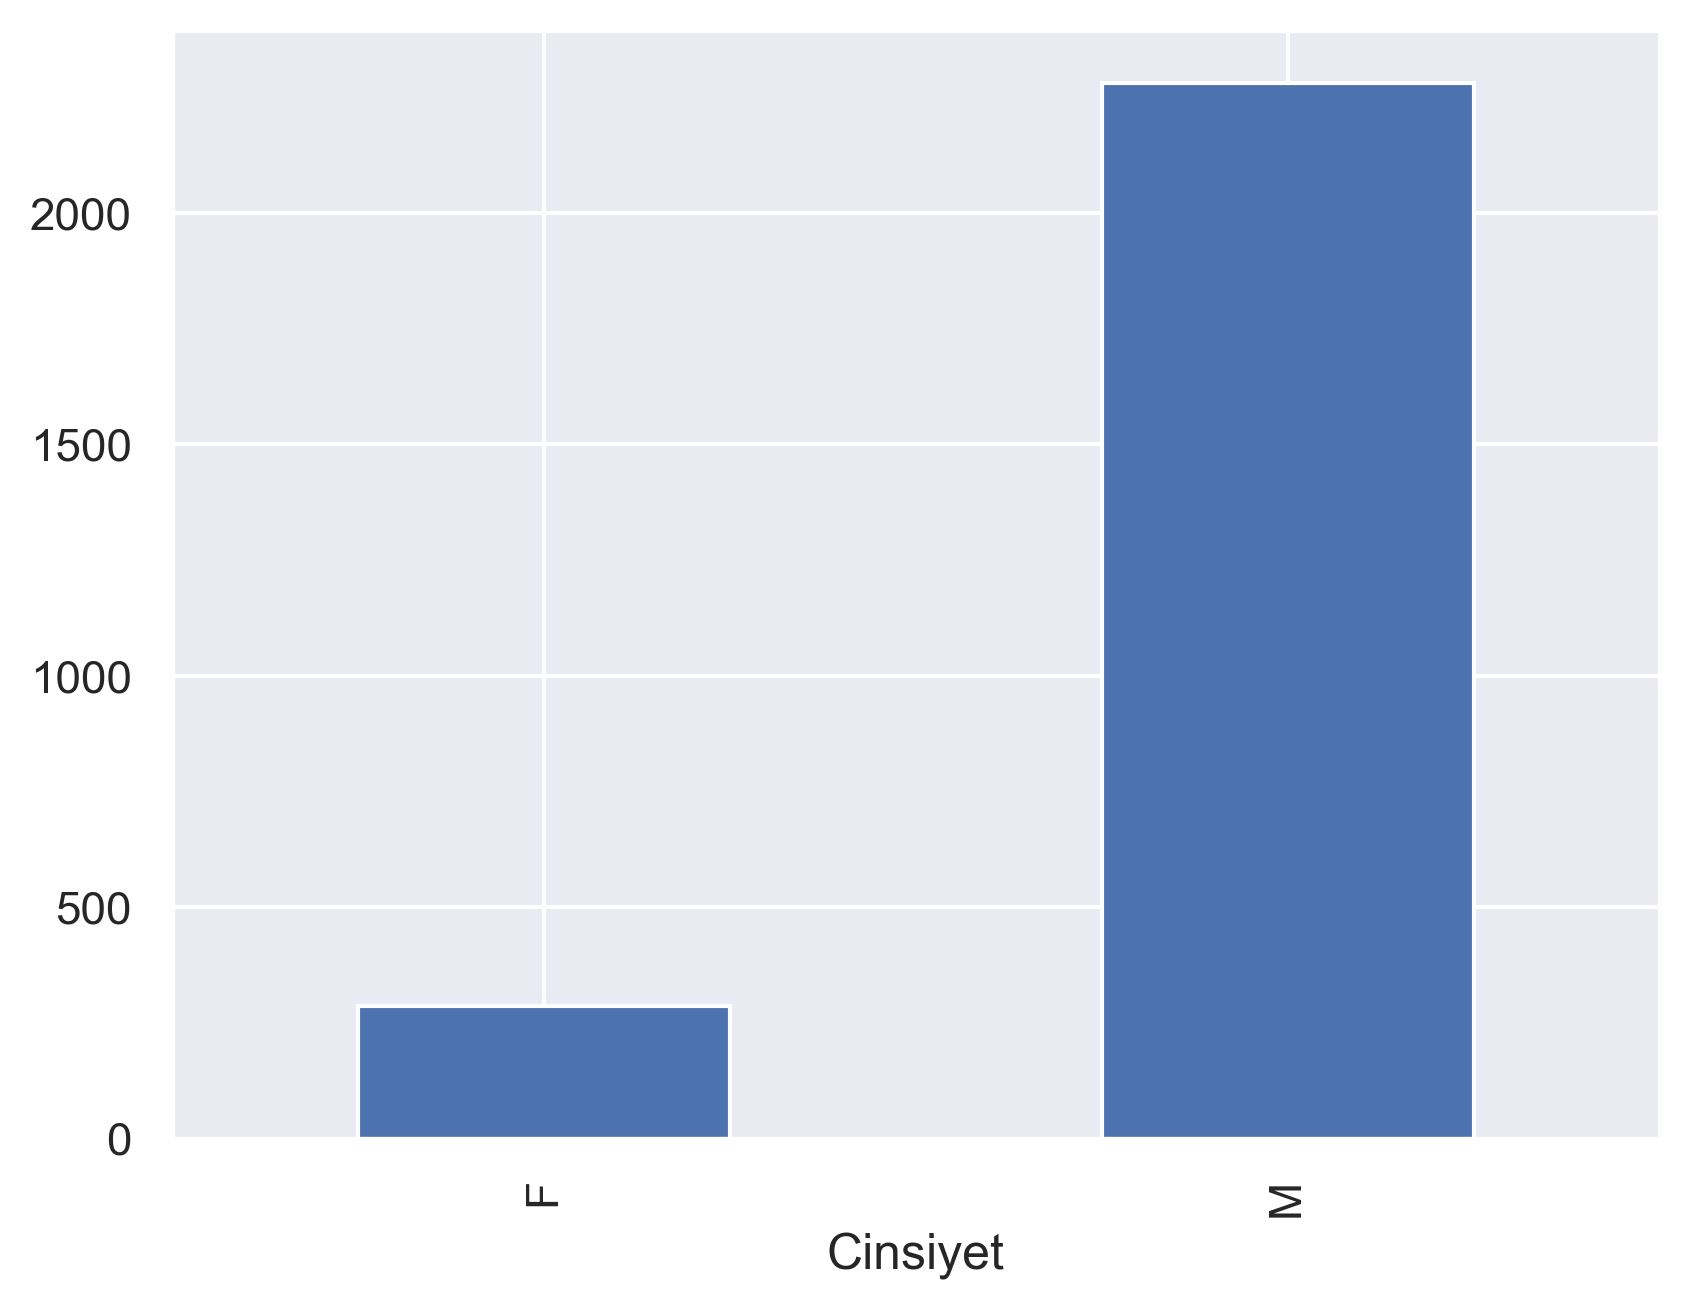

In [25]:
df_cinsiyet.size().plot(kind = "bar")

## Who are the top 10 richest in the world?

<Axes: xlabel='Servet', ylabel='İsim'>

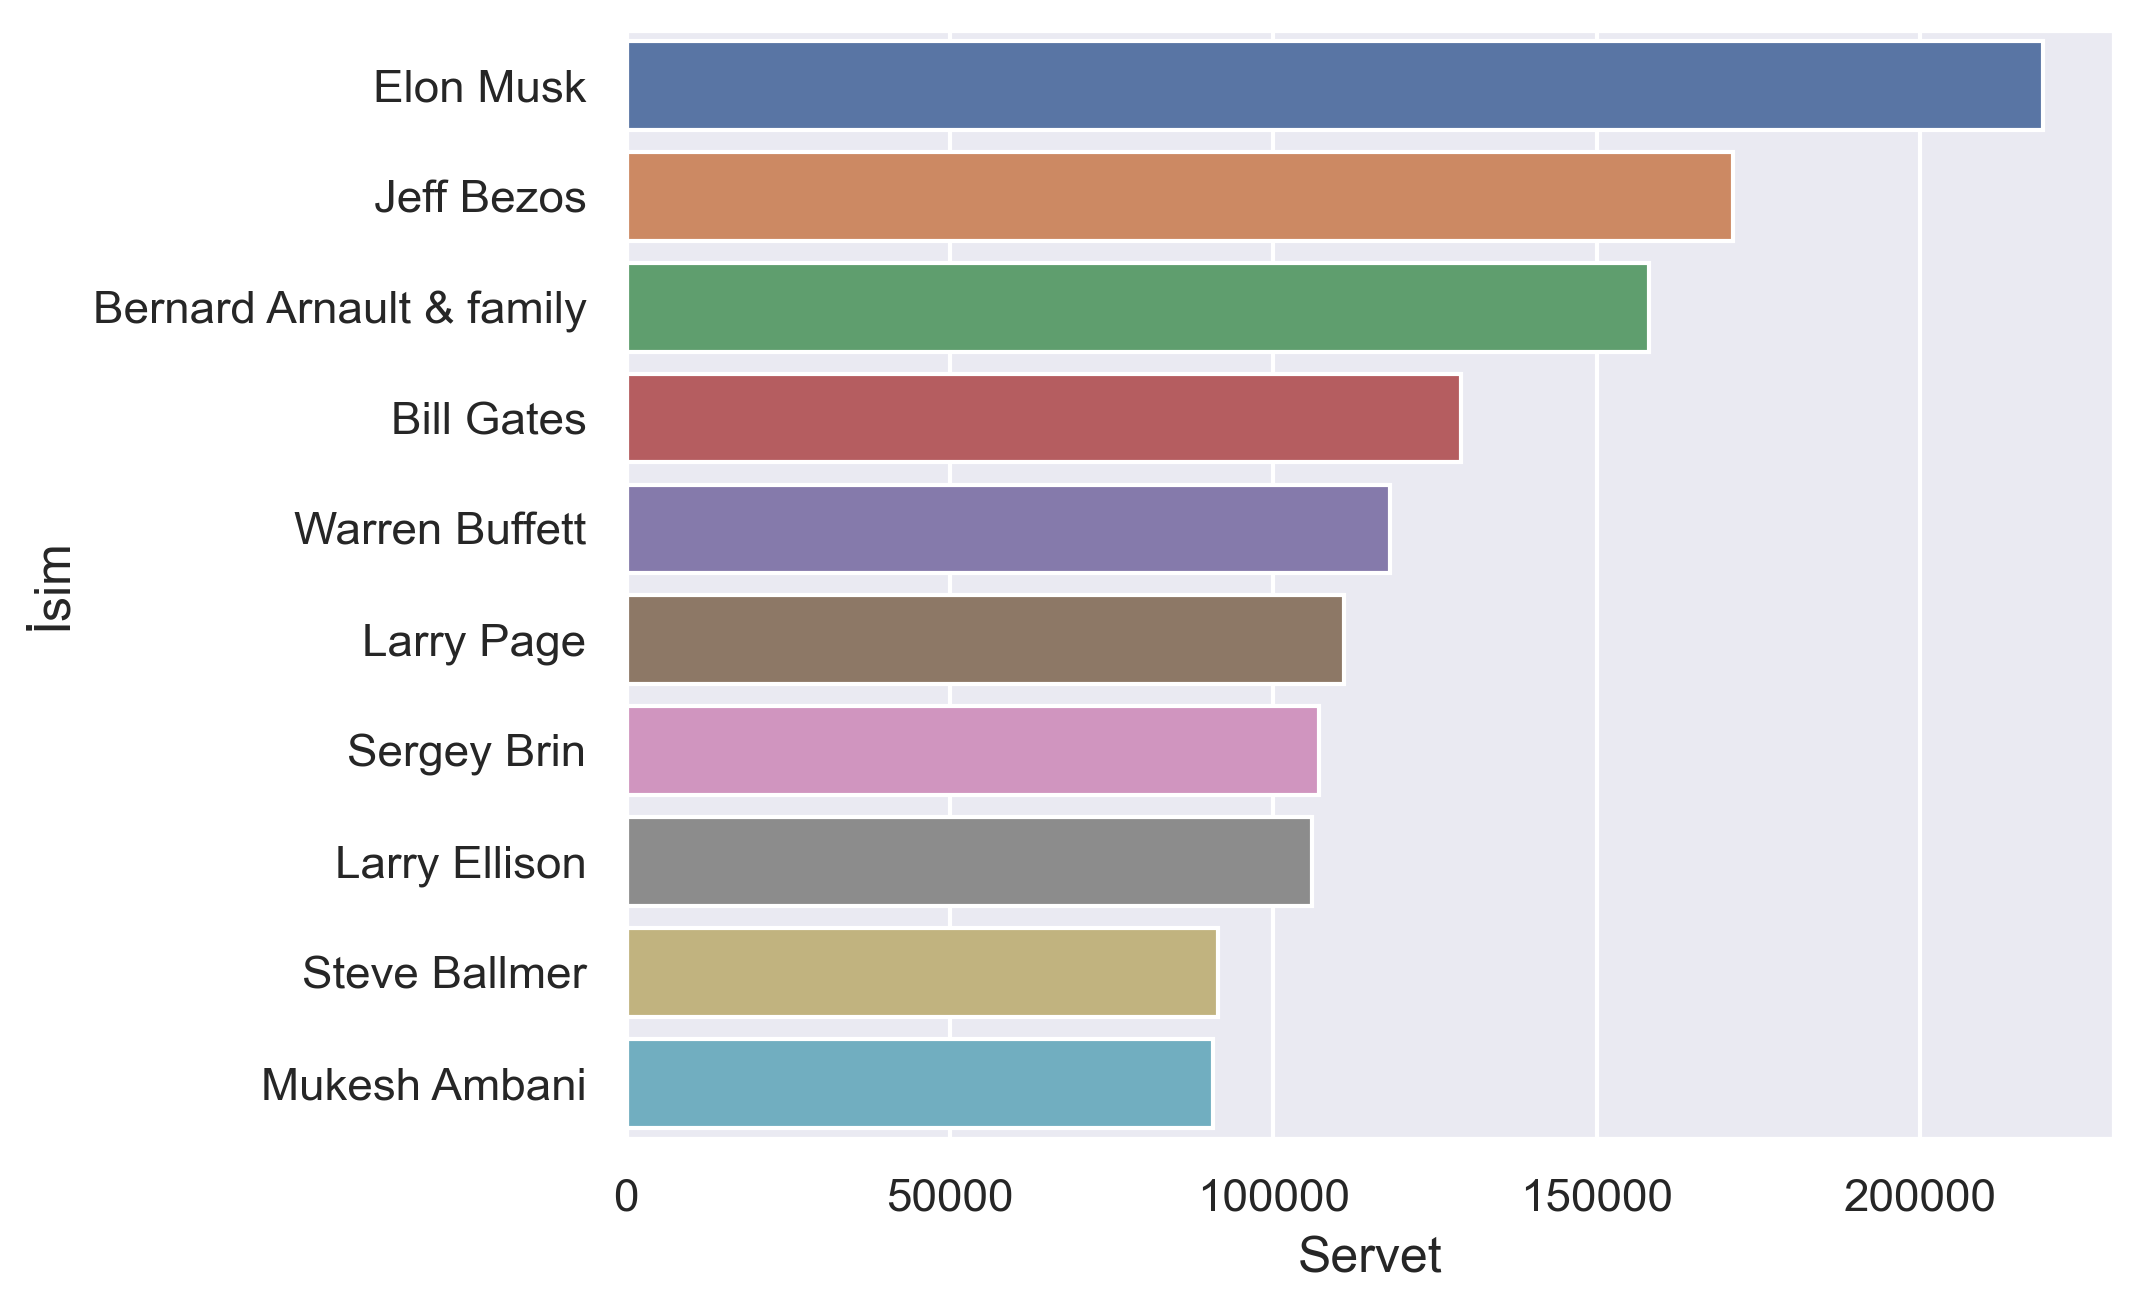

In [26]:
sns.barplot(y = df["İsim"][:10], x = df["Servet"][:10])

## Which country has the highest number of billionaires?

In [27]:
len(df["Ülke"].unique())

73

In [28]:
df_ulke = df.groupby("Ülke")

In [29]:
df_ulke_sayi = pd.DataFrame(df_ulke.size().sort_values(ascending=False), 
                           columns = ["Sayı"])

In [30]:
df_ulke_sayi.head()

,Sayı
Ülke,
United States,742
China,546
India,154
Germany,94
United Kingdom,81


<Axes: xlabel='Sayı', ylabel='Ülke'>

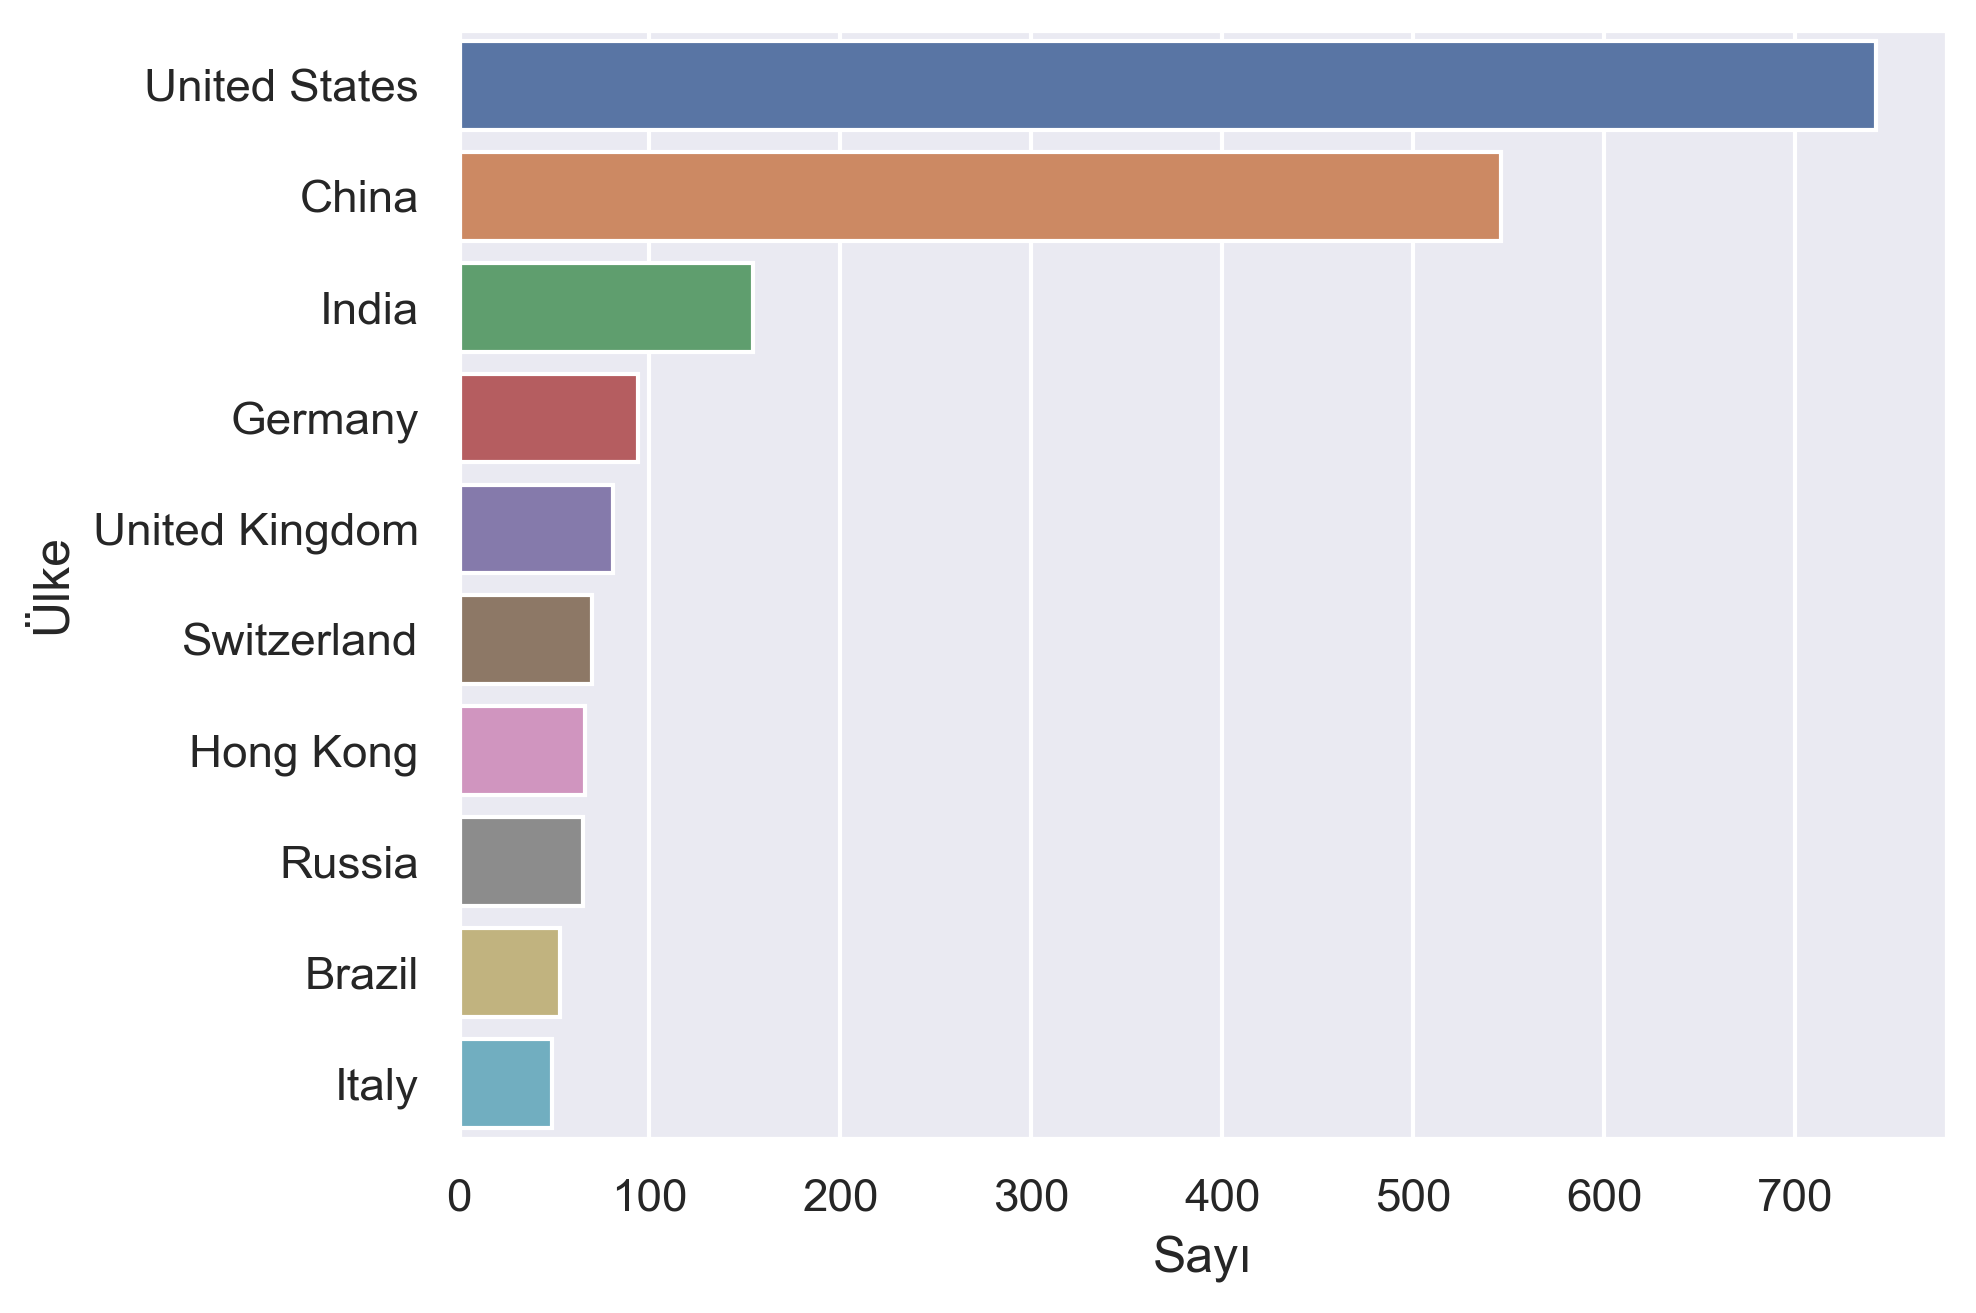

In [31]:
sns.barplot(x = df_ulke_sayi["Sayı"][:10] , y = df_ulke_sayi.index[:10])

## Who are the Top 10 richest in the Turkey?

In [32]:
df_turkiye = df[df["Ülke"]=="Turkey"]

In [33]:
df_turkiye["İsim"].count()

23

In [34]:
df_turkiye.head(10)

,İsim,Yaş,Servet,Kategori,Ülke,Cinsiyet
Sıra,,,,,,
601,Murat Ulker,63.0,4700.0,Food & Beverage,Turkey,M
1292,Ferit Faik Sahenk,58.0,2400.0,Diversified,Turkey,M
1341,Erman Ilicak,54.0,2300.0,Construction & Engineering,Turkey,M
1397,Filiz Sahenk,55.0,2200.0,Diversified,Turkey,F
1579,Sezai Bacaksiz,72.0,1900.0,Diversified,Turkey,M
1579,Nihat Ozdemir,72.0,1900.0,Diversified,Turkey,M
1645,Ibrahim Erdemoglu,59.0,1800.0,Manufacturing,Turkey,M
1818,Semahat Sevim Arsel,93.0,1600.0,Diversified,Turkey,F
1929,Hamdi Akin & family,67.0,1500.0,Diversified,Turkey,M


<Axes: xlabel='Servet', ylabel='İsim'>

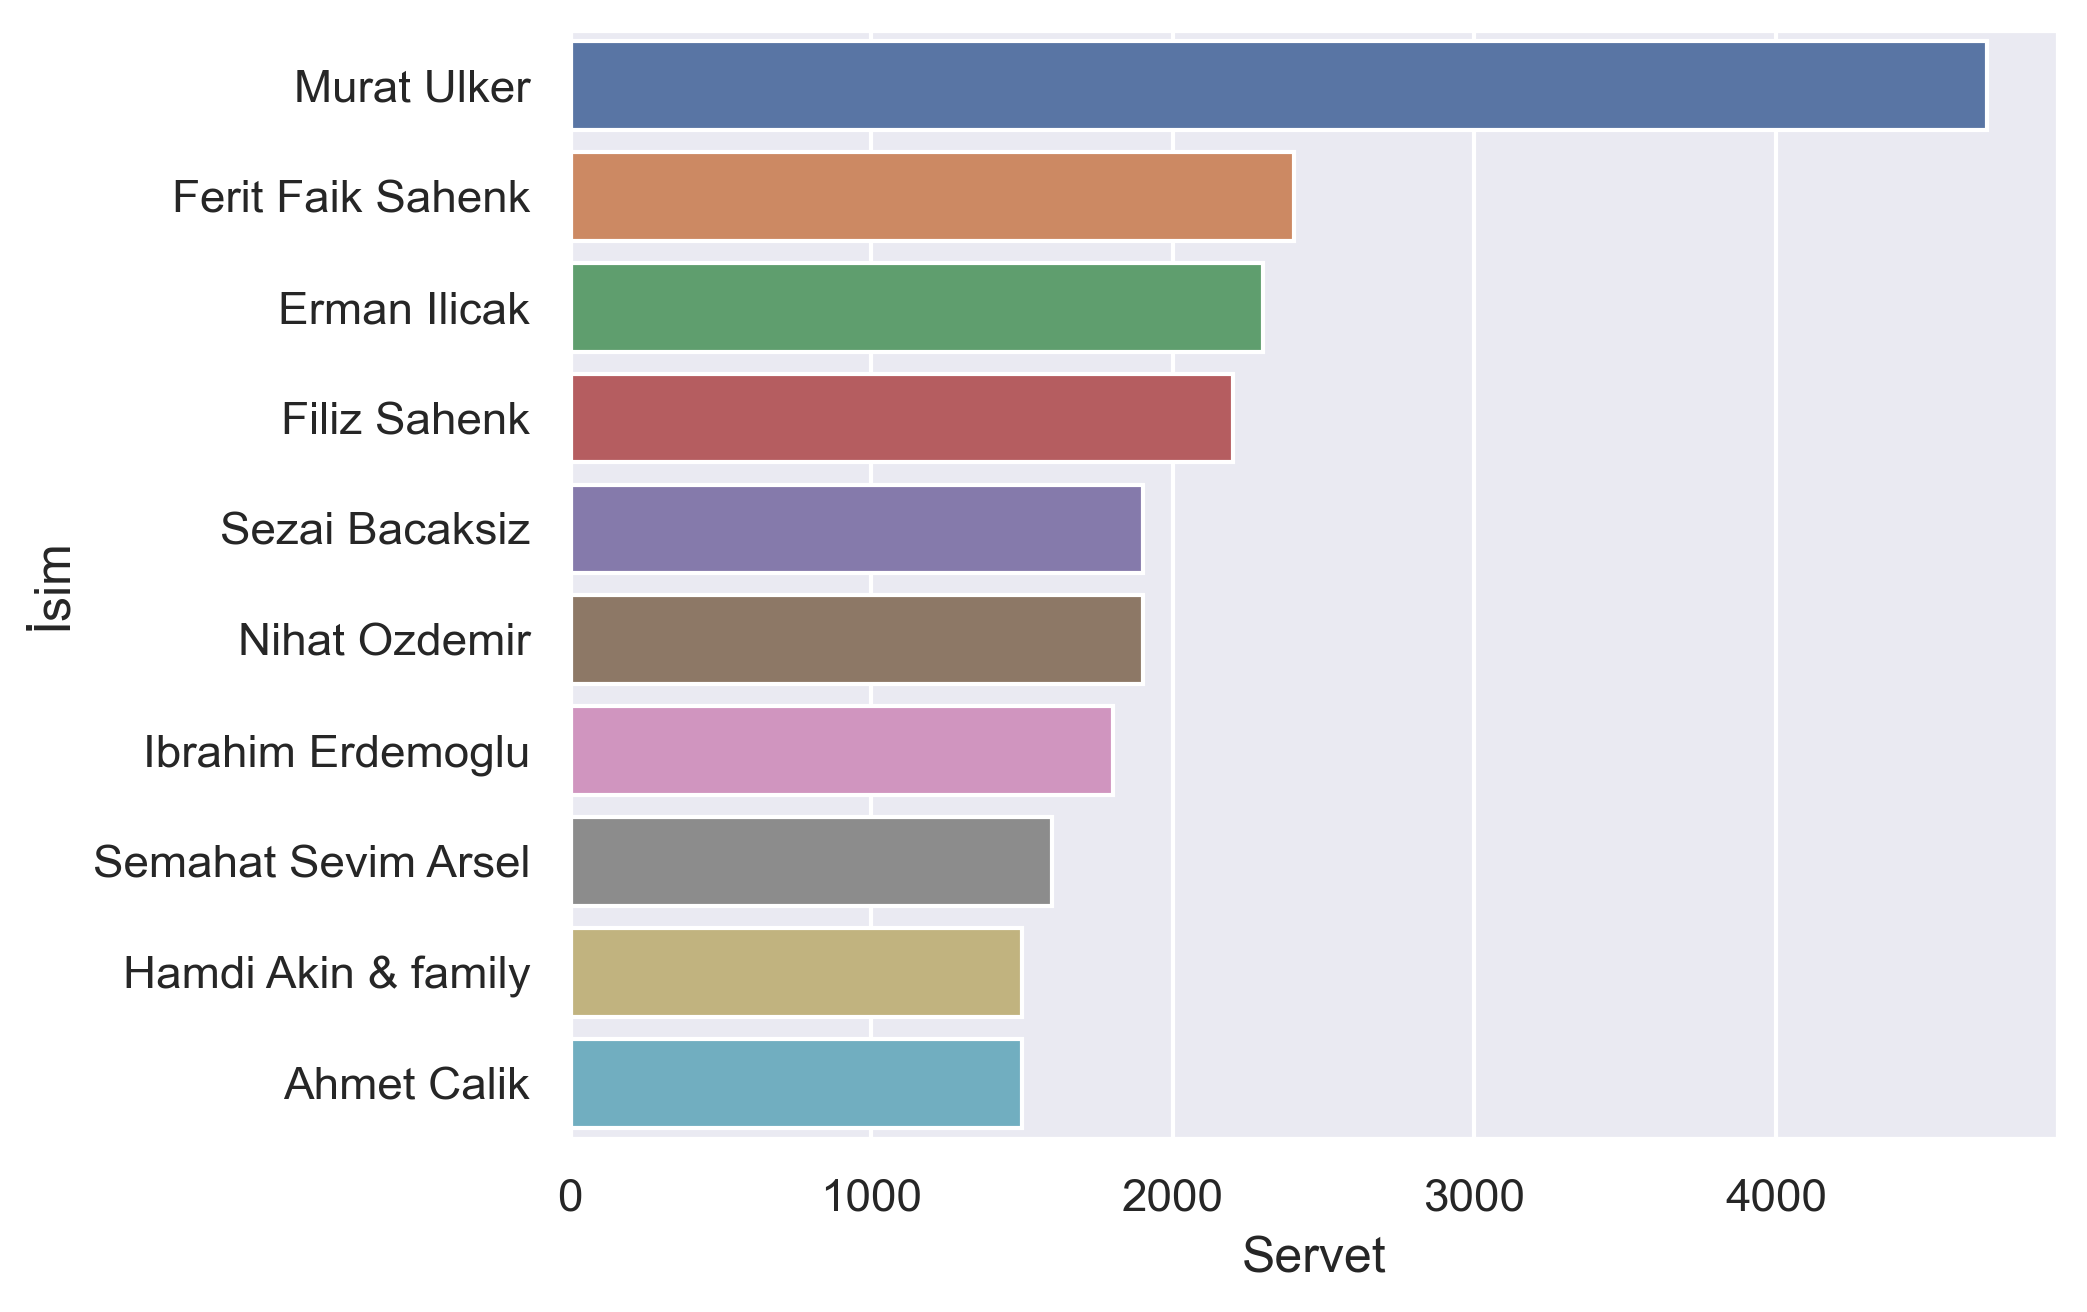

In [35]:
sns.barplot(y=df_turkiye["İsim"][:10], x = df_turkiye["Servet"][:10])

## Which Industry has the most billionaires in it?

In [36]:
df["Kategori"].unique()

array(['Automotive', 'Technology', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Media & Entertainment',
       'Telecom', 'Food & Beverage', 'Logistics', 'Real Estate',
       'Metals & Mining', 'Manufacturing', 'Gambling & Casinos',
       'Healthcare', 'Service', 'Energy', 'Construction & Engineering',
       'Sports'], dtype=object)

In [37]:
df["Kategori"]=df["Kategori"].apply(lambda x:x.replace(" ","")).\
    apply(lambda x:x.replace("&","_"))

In [38]:
df["Kategori"].unique()

array(['Automotive', 'Technology', 'Fashion_Retail',
       'Finance_Investments', 'Diversified', 'Media_Entertainment',
       'Telecom', 'Food_Beverage', 'Logistics', 'RealEstate',
       'Metals_Mining', 'Manufacturing', 'Gambling_Casinos', 'Healthcare',
       'Service', 'Energy', 'Construction_Engineering', 'Sports'],
      dtype=object)

In [39]:
df_kategori = df.groupby("Kategori").size()

In [40]:
df_kategori.head()

Kategori
Automotive                   66
Construction_Engineering     45
Diversified                 174
Energy                       93
Fashion_Retail              238
dtype: int64

In [41]:
df_kategori = df_kategori.to_frame()

In [42]:
df_kategori.head()

,0
Kategori,
Automotive,66
Construction_Engineering,45
Diversified,174
Energy,93
Fashion_Retail,238


In [43]:
df_kategori = df_kategori.rename(columns={0:"Sayi"}).sort_values(by="Sayi",
                                                                ascending=False)

In [44]:
df_kategori.head()

,Sayi
Kategori,
Finance_Investments,381
Technology,332
Manufacturing,319
Fashion_Retail,238
Healthcare,209


<Axes: xlabel='Sayi', ylabel='Kategori'>

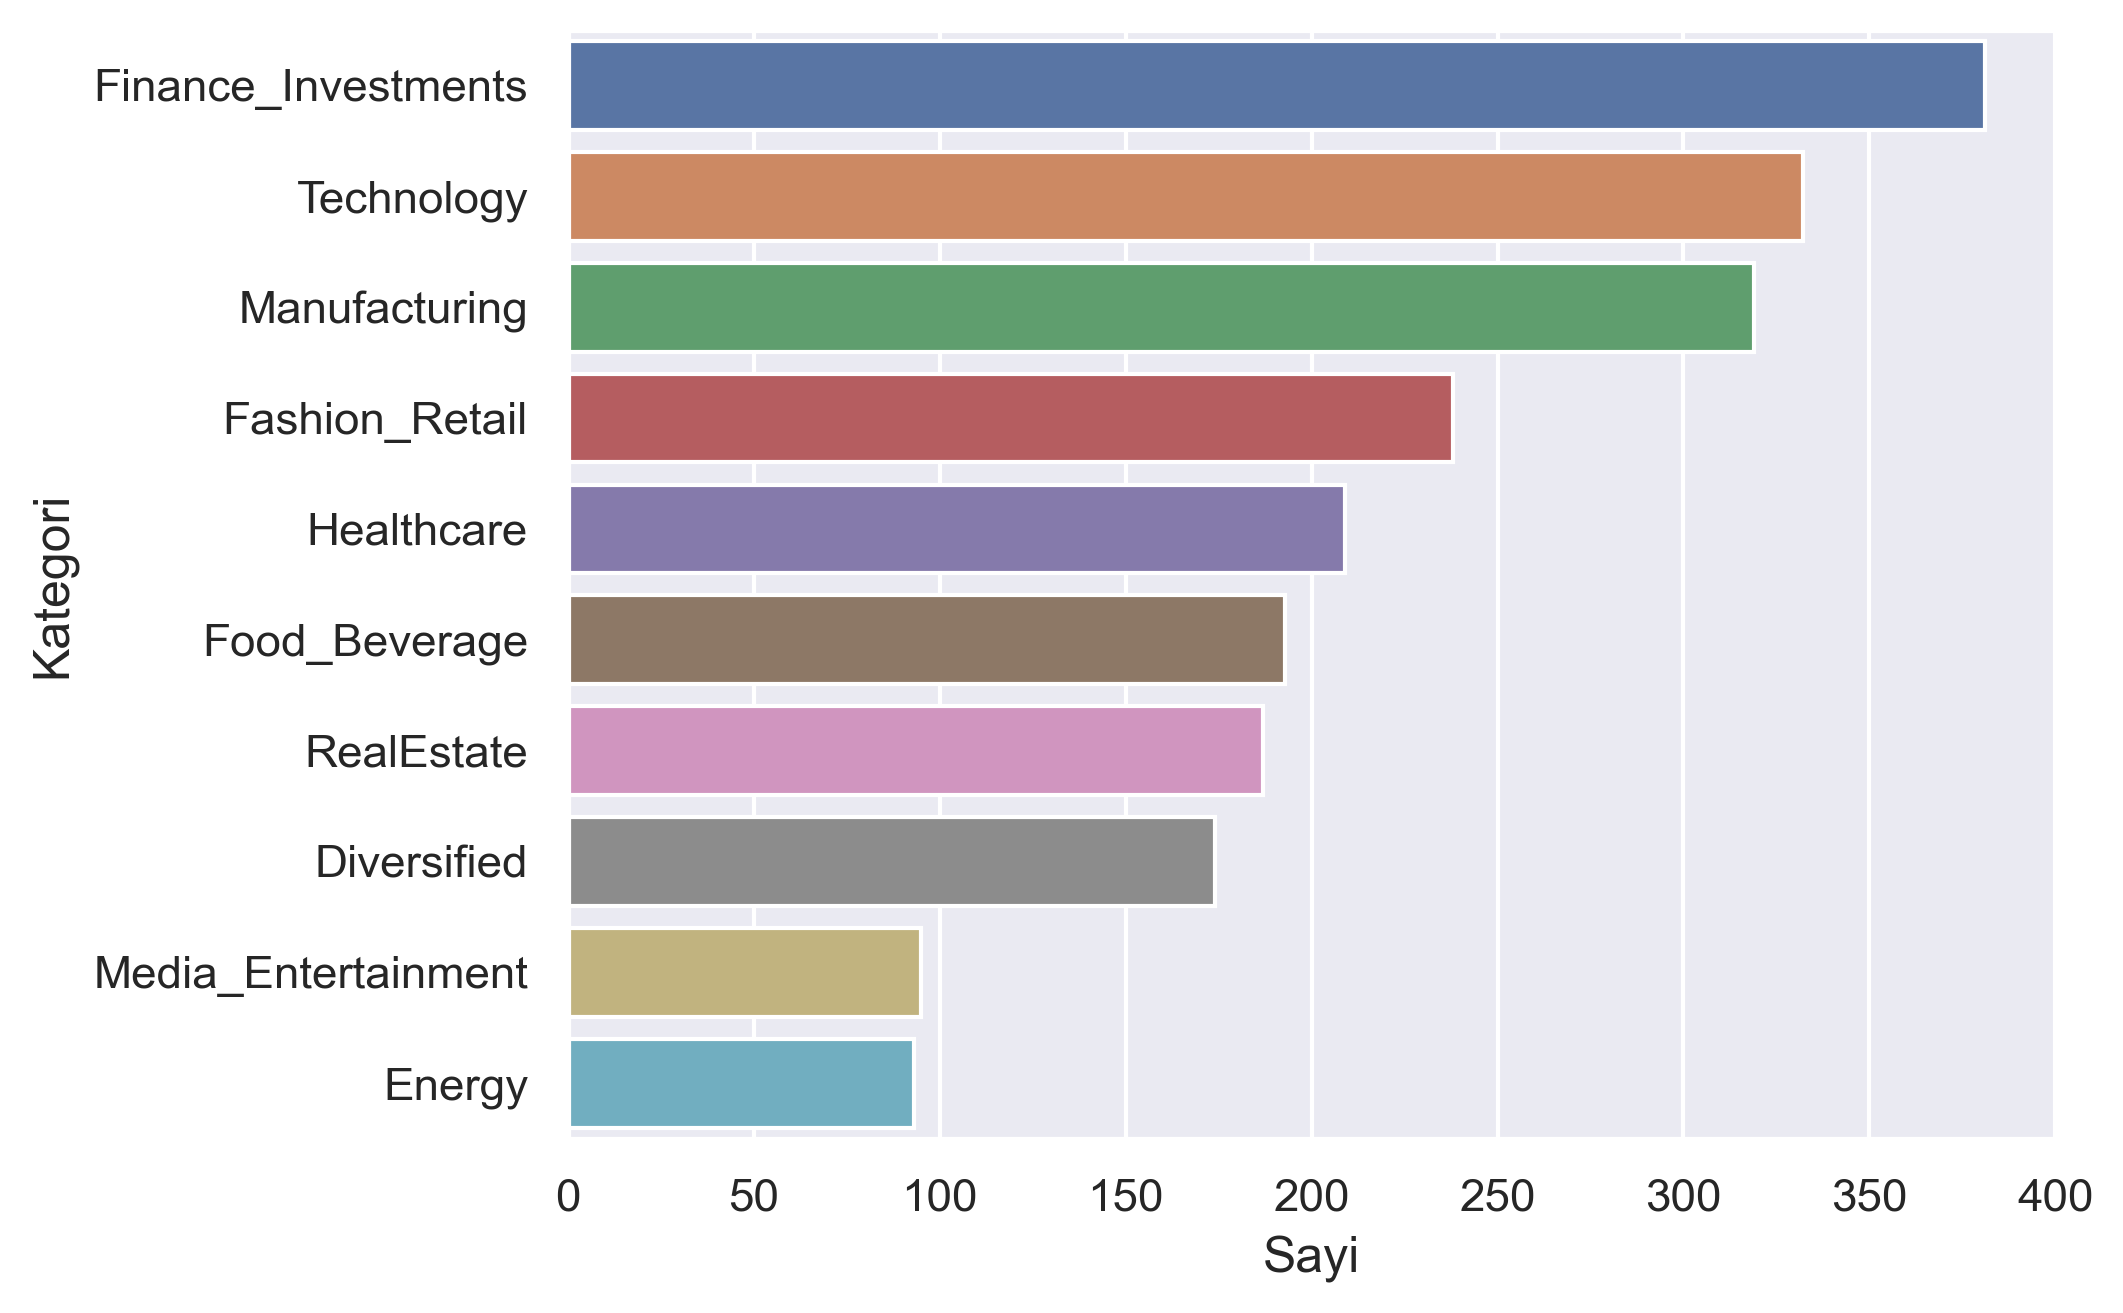

In [45]:
sns.barplot( x = df_kategori["Sayi"][:10], y = df_kategori.index[:10])

## Is there a relationship between money and age?

In [46]:
sns.scatterplot(df["Yaş"],df["Servet"])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

## The distribution of age

<AxesSubplot:xlabel='Yaş', ylabel='Count'>

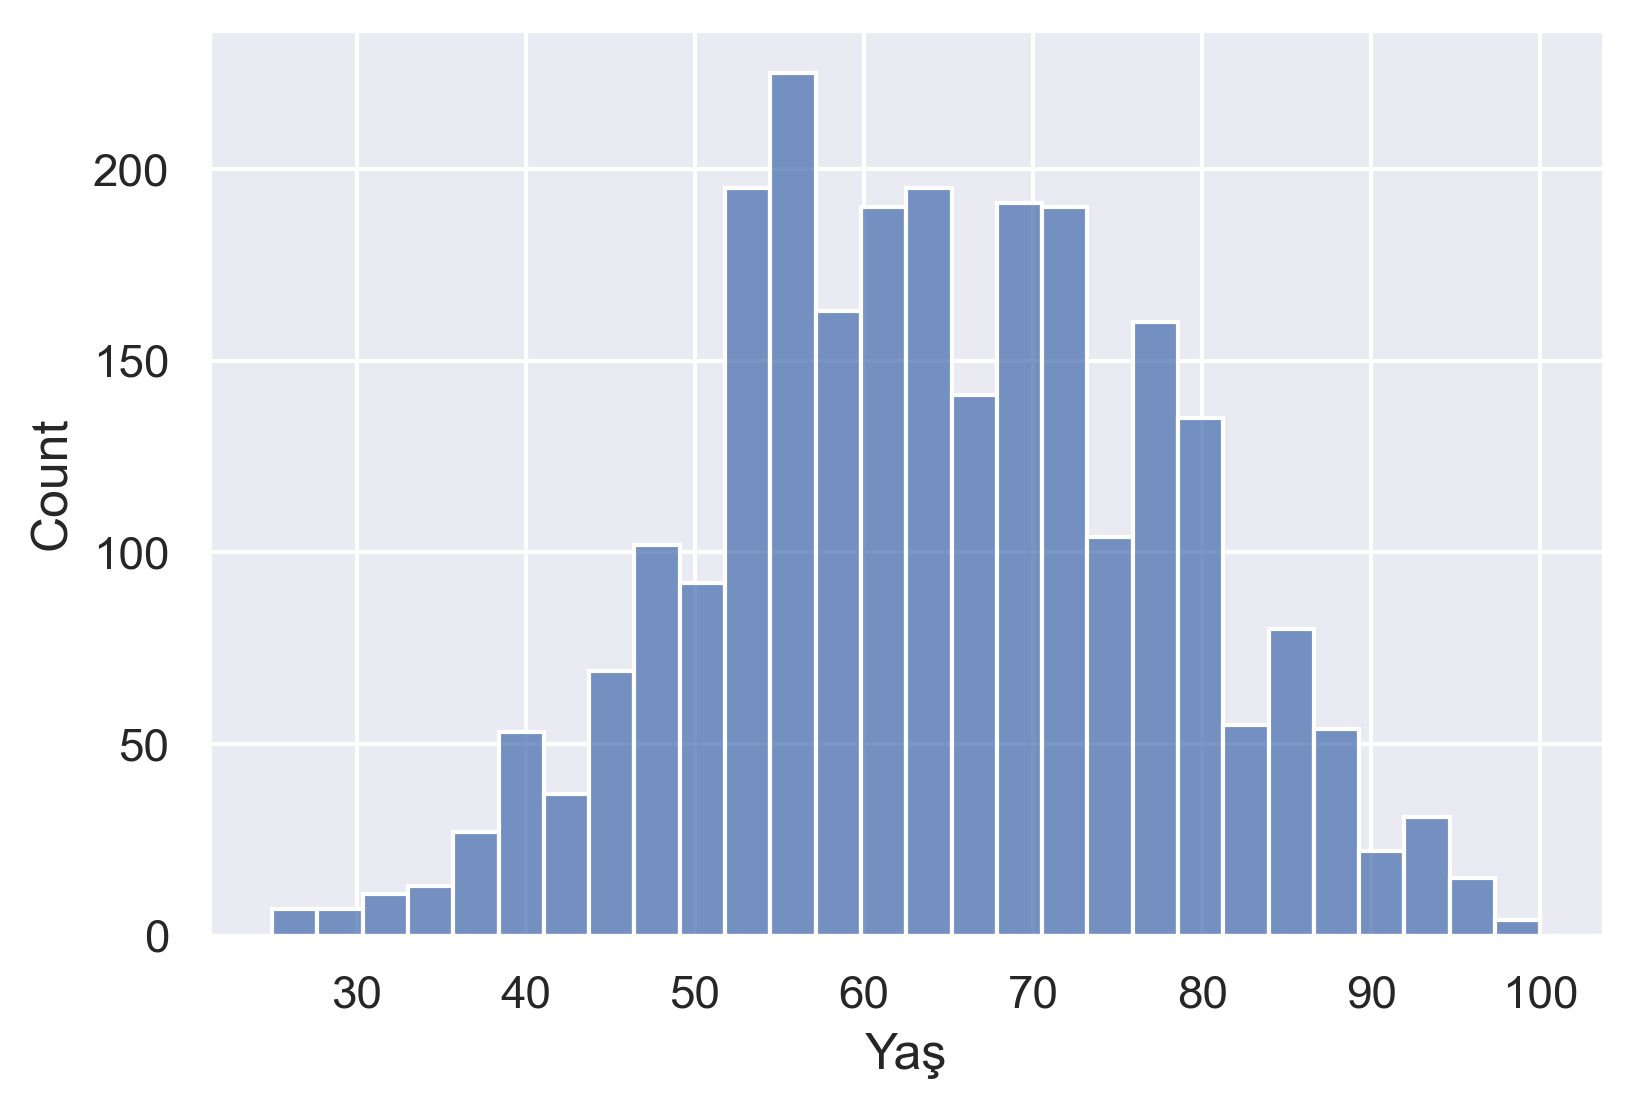

In [ ]:
sns.histplot(df["Yaş"])

## The youngest billionaires

In [ ]:
df_yas = df.sort_values(by="Yaş")
df_yas

,İsim,Yaş,Servet,Kategori,Ülke,Cinsiyet
Sıra,,,,,,
2190,Alexandra Andresen,25.0,1300.0,Diversified,Norway,F
1929,Wang Zelong,25.0,1500.0,Metals_Mining,China,M
1929,Pedro Franceschi,25.0,1500.0,Finance_Investments,United States,M
1929,Henrique Dubugras,26.0,1500.0,Finance_Investments,United States,M
2190,Katharina Andresen,26.0,1300.0,Diversified,Norway,F
...,...,...,...,...,...,...
1929,Ana Maria Brescia Cafferata,97.0,1500.0,Diversified,Peru,F
163,Robert Kuok,98.0,11700.0,Diversified,Hong Kong,M
1341,David Murdock,98.0,2300.0,Food_Beverage,United States,M


<AxesSubplot:xlabel='Yaş', ylabel='İsim'>

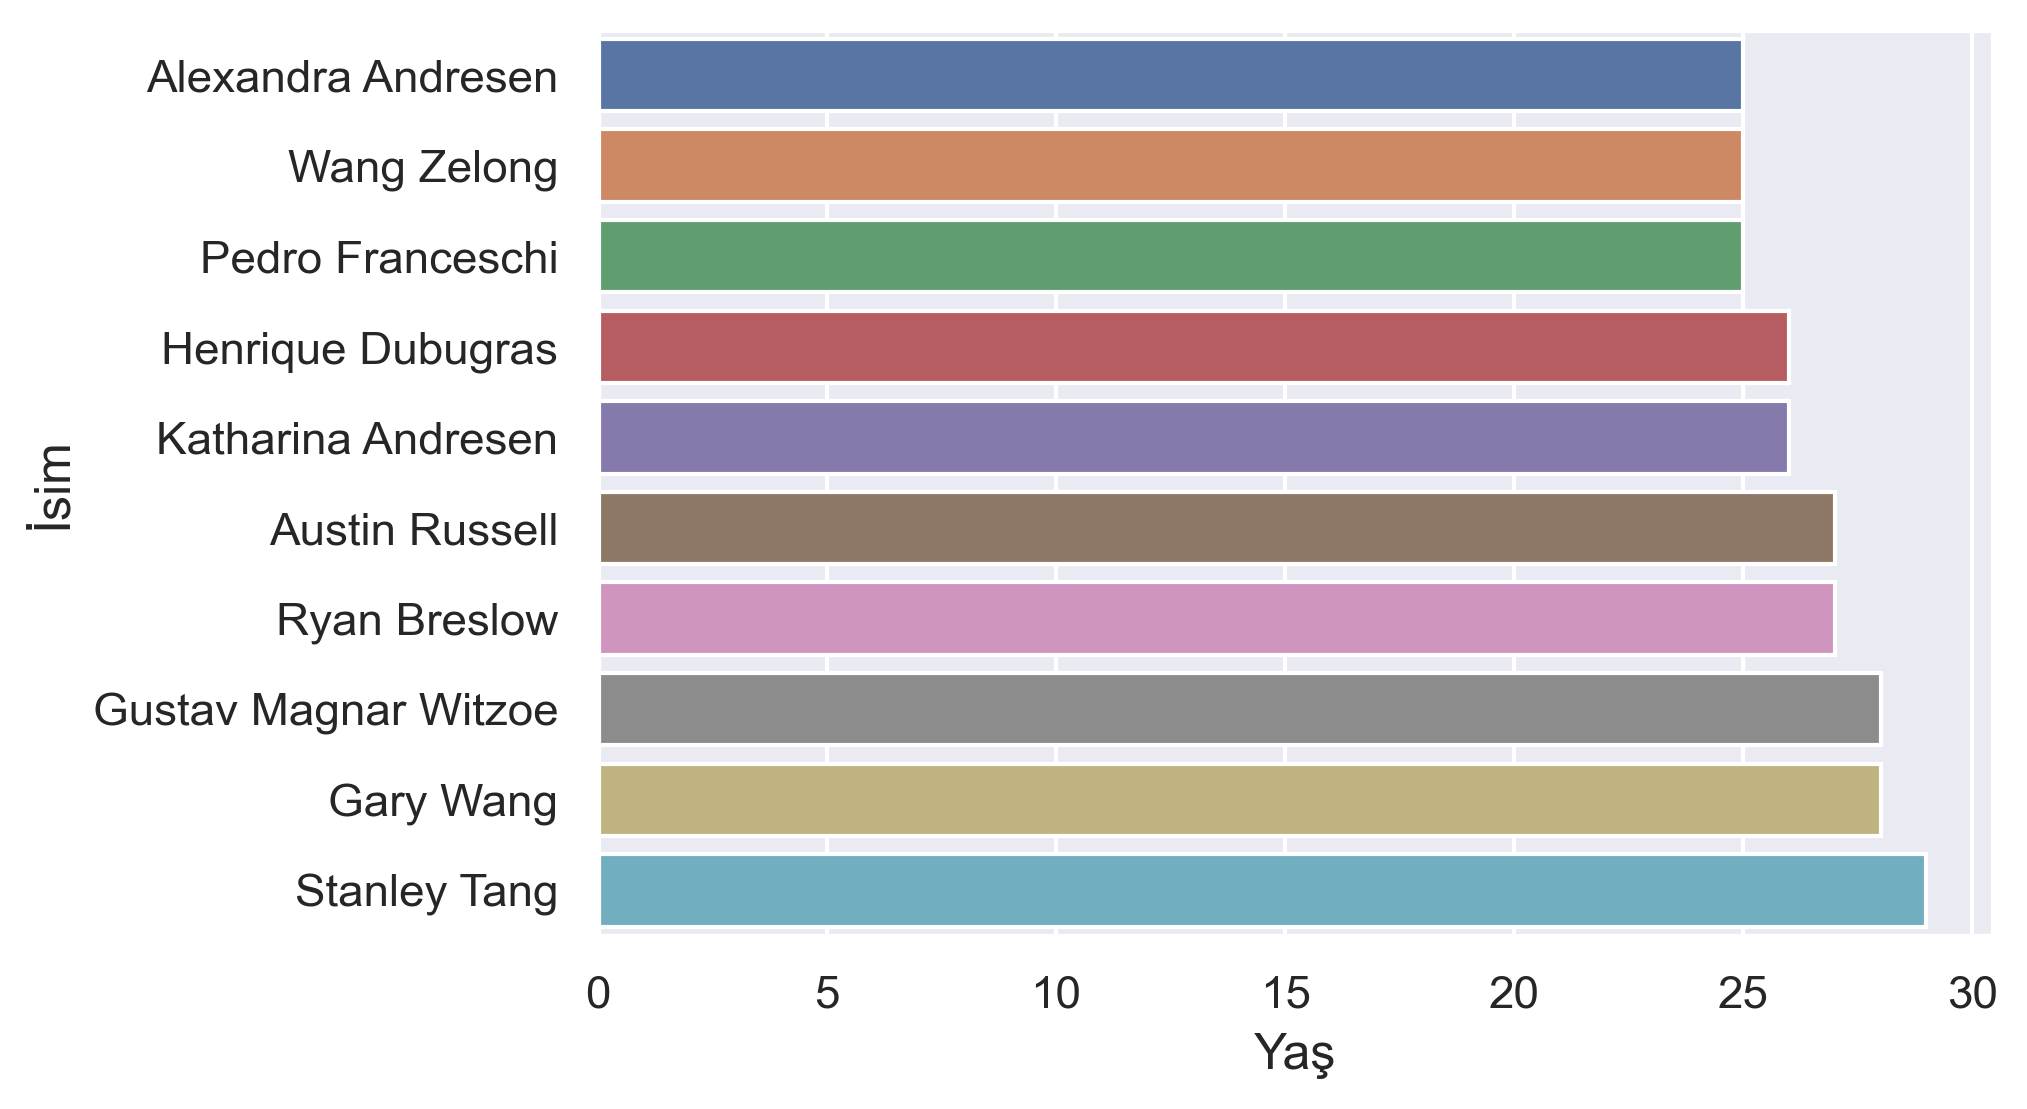

In [ ]:
sns.barplot(y=df_yas["İsim"][:10], x = df_yas["Yaş"][:10])

Don't forget to follow us on [YouTube](http://youtube.com/@Be.Analyst) | [Medium](https://medium.com/@durgeshanalyst) | [Twitter](https://twitter.com/DurgeshBR?t=2LDCN4pHkZOYIo3rMXvKnw&s=09) | [GitHub](http://github.com/durgeshanalyst) | [Linkedin](https://www.linkedin.com/in/durgeshanalyst/) | [Kaggle](https://www.kaggle.com/durgeshanalyst) 😎